In [28]:
from itertools import combinations
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from constants import get_problem
from SALib.analyze import sobol
from SALib.util.results import ResultDict

In [29]:
input_dir: str = "outputs"

In [30]:
# load the measurement data
df_list = []
for file in listdir(input_dir):
    df_file = pd.read_csv(
        f"{input_dir}/{file}",
        index_col=0,
    )
    del df_file["citizen"]
    del df_file["police"]
    df_list.append(df_file)
df = pd.concat(df_list)
df

,RunId,iteration,Step,legitimacy,active_threshold,reversion_rate,prob_quiet,active,quiet,arrested
0,1,0,100,0.154718,0.086066,0.414103,0.268002,0,85,1015
1,0,0,100,0.154718,0.086066,0.414103,0.181028,0,63,1081
2,12,0,100,0.597739,0.150292,0.077067,0.086224,2,303,795
3,6,0,100,0.927150,0.585486,0.651676,0.075303,0,1095,0
4,5,0,100,0.927150,0.585486,0.813550,0.460647,0,1126,0
...,...,...,...,...,...,...,...,...,...,...
251,251,0,100,0.858439,0.587423,0.368442,0.112777,0,1114,0
252,247,0,100,0.351486,0.709861,0.590628,0.404135,0,1120,0
253,253,0,100,0.714717,0.587423,0.773278,0.112777,0,1148,0
254,250,0,100,0.714717,0.587423,0.368442,0.112777,0,1118,0


In [31]:
# analyze the sensitivity
problem = get_problem()

arrested = sobol.analyze(problem, df["arrested"].values, print_to_console=True)
quiet = sobol.analyze(problem, df["quiet"].values, print_to_console=True)
active = sobol.analyze(problem, df["active"].values, print_to_console=True)

/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.694517  0.014817
active_threshold  0.765834  0.018108
reversion_rate    0.830479  0.019114
prob_quiet        0.913022  0.016839
                        S1   S1_conf
legitimacy        0.012822  0.023788
active_threshold  0.028320  0.021668
reversion_rate    0.075259  0.022961
prob_quiet        0.118142  0.026763
                                          S2   S2_conf
(legitimacy, active_threshold)      0.185057  0.037401
(legitimacy, reversion_rate)        0.202546  0.034723
(legitimacy, prob_quiet)            0.224366  0.035385
(active_threshold, reversion_rate)  0.133233  0.033680
(active_threshold, prob_quiet)      0.140751  0.031101
(reversion_rate, prob_quiet)        0.016791  0.034968


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.695325  0.018499
active_threshold  0.764668  0.020401
reversion_rate    0.830224  0.018253
prob_quiet        0.912869  0.020867
                        S1   S1_conf
legitimacy        0.012467  0.022851
active_threshold  0.028806  0.021777
reversion_rate    0.075217  0.021442
prob_quiet        0.118491  0.023327
                                          S2   S2_conf
(legitimacy, active_threshold)      0.184079  0.034332
(legitimacy, reversion_rate)        0.202979  0.031060
(legitimacy, prob_quiet)            0.223541  0.035234
(active_threshold, reversion_rate)  0.132354  0.032856
(active_threshold, prob_quiet)      0.139311  0.032741
(reversion_rate, prob_quiet)        0.015626  0.031287


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        1.937906  1.873502
active_threshold  1.084310  0.422832
reversion_rate    1.000824  0.267902
prob_quiet        0.904678  0.245547
                        S1   S1_conf
legitimacy        0.047073  0.084868
active_threshold -0.004342  0.035915
reversion_rate    0.028168  0.045055
prob_quiet        0.014146  0.041382
                                          S2   S2_conf
(legitimacy, active_threshold)     -0.025951  0.099579
(legitimacy, reversion_rate)       -0.055911  0.102825
(legitimacy, prob_quiet)           -0.037860  0.092968
(active_threshold, reversion_rate)  0.007195  0.052183
(active_threshold, prob_quiet)      0.047308  0.066445
(reversion_rate, prob_quiet)       -0.026314  0.064164


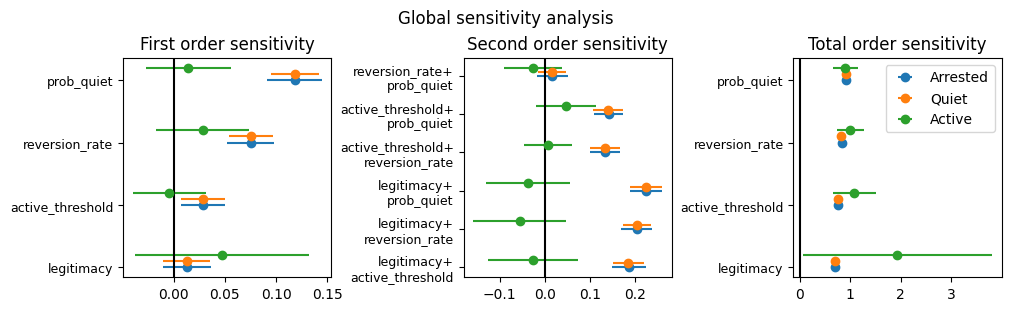

In [87]:
def plot_all_indices(analyses: dict[str, ResultDict], params, title=""):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        analyses (dict[str, ResultDict]): dictionary mapping the name of the analysis to
            dictionaries {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the names of the parameters in the analyses
        title (str): title for the plot
    """
    single_names = params
    second_names = [f"{x}+\n{y}" for x, y in combinations(params, 2)]

    fig, axes = plt.subplots(1, 3, figsize=(10, 3), layout="compressed")

    for nr, analysis in enumerate(analyses.items()):
        name, s = analysis
        for i in ["1", "2", "T"]:
            # first order
            if i == "1":
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[0].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # second order
            elif i == "2":
                flattened = s["S" + i].flatten()
                indices = flattened[~np.isnan(flattened)]

                flattened = s["S" + i + "_conf"].flatten()
                errors = flattened[~np.isnan(flattened)]
                axes[1].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # total order
            else:
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[2].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )

    axes[0].set_yticks(range(len(single_names)), single_names, size=9)
    axes[1].set_yticks(range(len(second_names)), second_names, size=9)
    axes[2].set_yticks(range(len(single_names)), single_names, size=9)

    axes[0].axvline(0, c="k")
    axes[1].axvline(0, c="k")
    axes[2].axvline(0, c="k")

    axes[0].set_title("First order sensitivity")
    axes[1].set_title("Second order sensitivity")
    axes[2].set_title("Total order sensitivity")

    axes[2].legend()
    fig.suptitle(title)


plot_all_indices(
    {"Arrested": arrested, "Quiet": quiet, "Active": active},
    problem["names"],
    "Global sensitivity analysis",
)
plt.show()

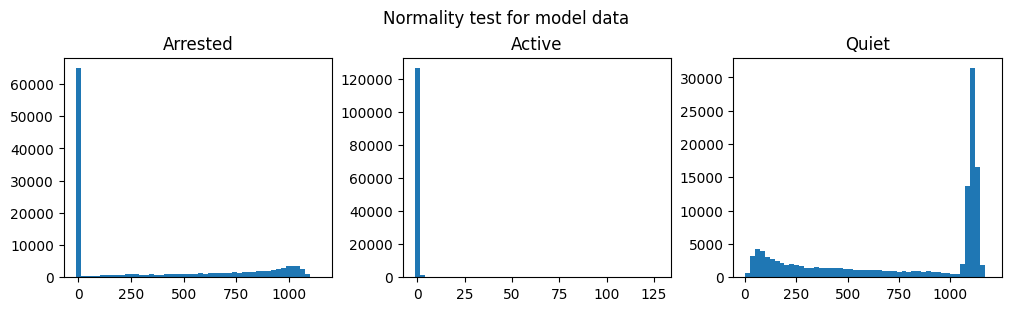

In [ ]:
def plot_hist(arrest_hist, arrest_bins, ax, title):
    ax.bar(arrest_bins[:-1], arrest_hist, width=arrest_bins[1] - arrest_bins[0])
    ax.set_title(title)


fig, axes = plt.subplots(1, 3, figsize=(10, 3), layout="compressed")
plot_hist(*np.histogram(df["arrested"].values, bins=50), axes[0], "Arrested")
plot_hist(*np.histogram(df["active"].values, bins=50), axes[1], "Active")
plot_hist(*np.histogram(df["quiet"].values, bins=50), axes[2], "Quiet")
fig.suptitle("Normality test for model data")
plt.show()